###### Importing the important libraries to proceed 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


plt.rcParams['figure.figsize'] = (16,10)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing boston data from sklearn library and converting into dataframe 
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# lets see the problem statement and dataset's nature 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
target = pd.DataFrame(boston.target)

data = pd.concat((data,target),axis=1)



In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Lets change the target column name :
data.columns = ['MEDV' if x==0 else x for x in data.columns]

In [7]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.shape

(506, 14)

In [9]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


#####  Correlation analysis and feature selection :

In [10]:
# To avoid many zeros and to improve readabiltity :
pd.options.display.float_format = '{:,.3f}'.format

In [11]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


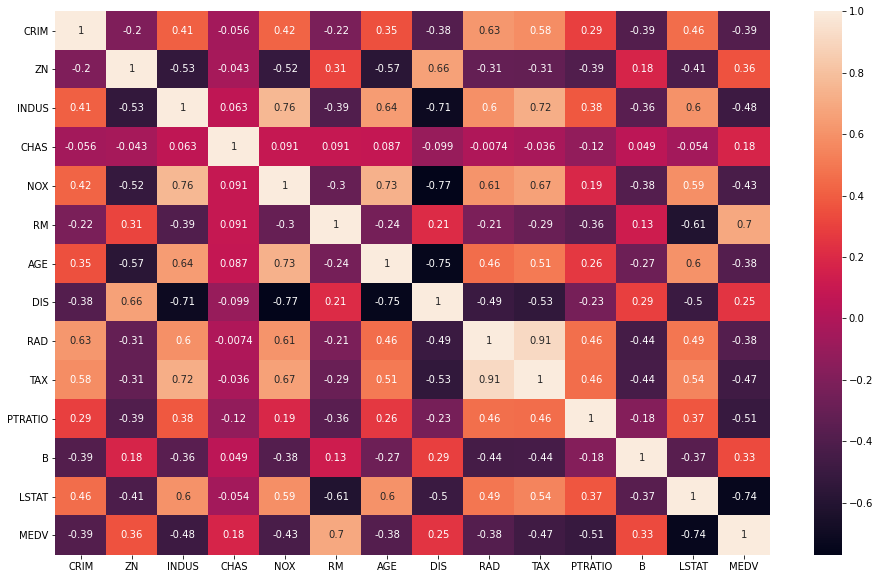

<Figure size 1152x720 with 0 Axes>

In [12]:
sns.heatmap(data.corr(),annot=True)
plt.figure(figsize=(16,10))
plt.show()

##### Simple linear regression with sk learn 

###### Here we are choosing the RM value to proceed with Simple linear regression :

In [13]:
X = data['RM'].values.reshape(-1,1)

In [14]:
y = data['MEDV'].values

In [15]:
# Lets import the linear regression fron the sk learn package and create a instance of it 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [16]:
# Lets fit the model
linear.fit(X,y)

LinearRegression()

In [17]:
linear.coef_ # Betta 

array([9.10210898])

In [18]:
linear.intercept_ # C 

-34.670620776438554

In [19]:
# Hence our simple linear regression is working good

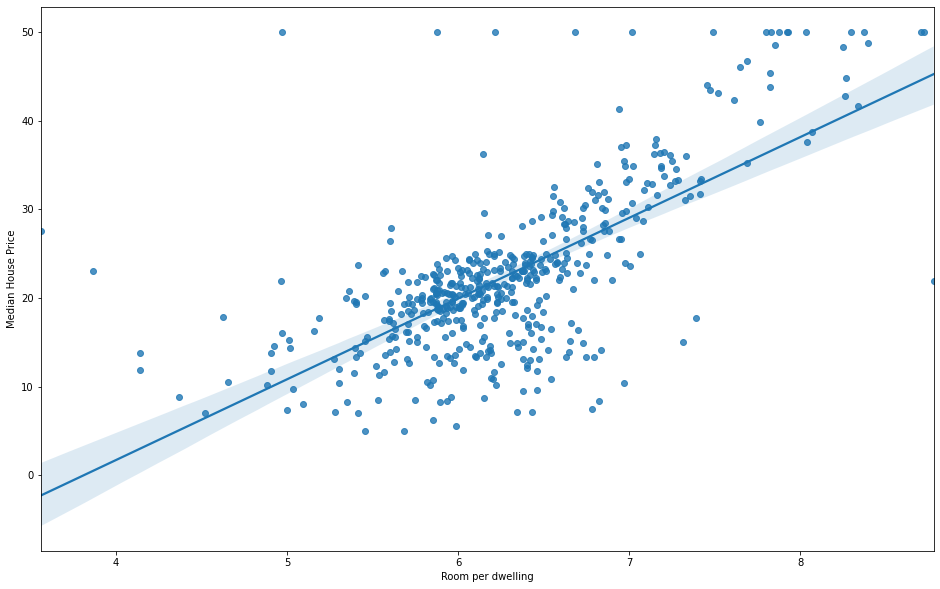

In [20]:
# Our Model is ready but lets see the linear relationship :
sns.regplot(X,y)
plt.xlabel('Room per dwelling')
plt.ylabel('Median House Price')
plt.show()

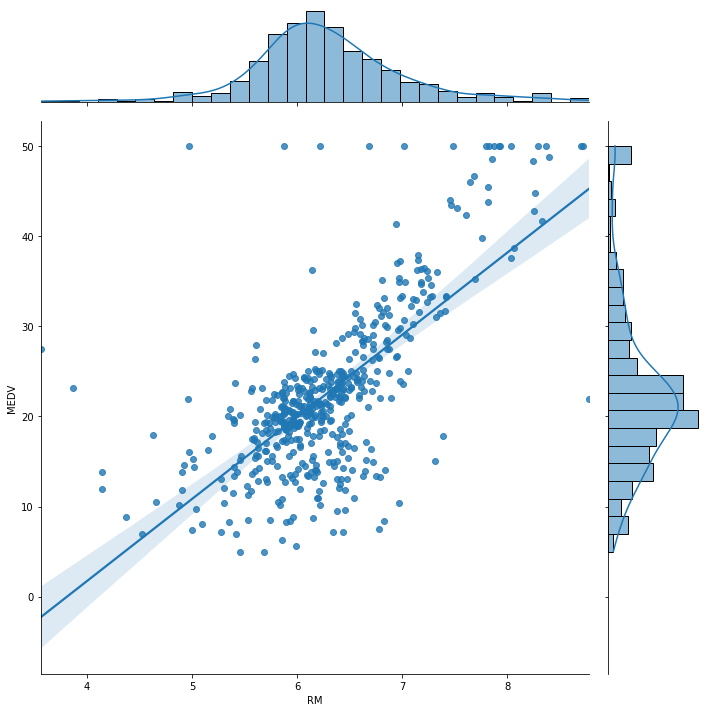

<Figure size 1152x720 with 0 Axes>

In [21]:
# Lets see the distplot :
sns.jointplot(x = 'RM' , y = 'MEDV', data=data, kind='reg',height=10)
plt.figure(figsize=(16,10))
plt.show();

In [22]:
# Prediction
linear.predict(np.array([7]).reshape(-1,1))

array([29.04414209])

In [23]:
9.10210898*(7)+-34.670620776438554

29.044142083561454

###### Introduction to Robust Regression
https://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html
refer this 

In [24]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

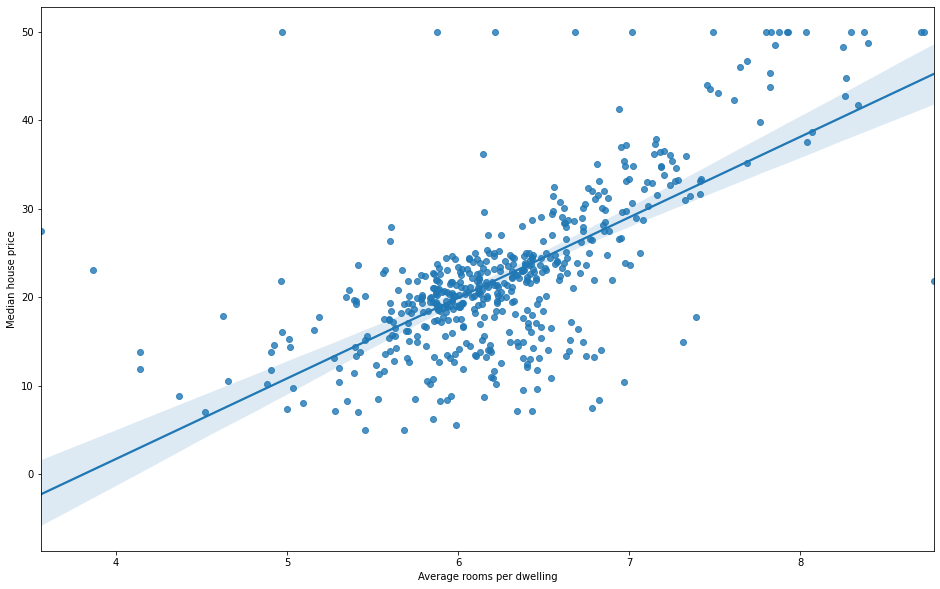

In [25]:
# A normal Reg plot 
sns.regplot(X,y)
plt.xlabel("Average rooms per dwelling")
plt.ylabel("Median house price")
plt.show()

In [26]:
ransac.fit(X,y)

RANSACRegressor()

In [27]:
inlier_mask = ransac.inlier_mask_
outlier = np.logical_not(inlier_mask)

In [28]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [29]:
line = np.arange(3,10,1)

In [30]:
line_y_ransac = ransac.predict(line.reshape(-1,1))

In [31]:
line_y_ransac

array([-6.45632594,  2.74585724, 11.94804041, 21.15022359, 30.35240677,
       39.55458995, 48.75677313])

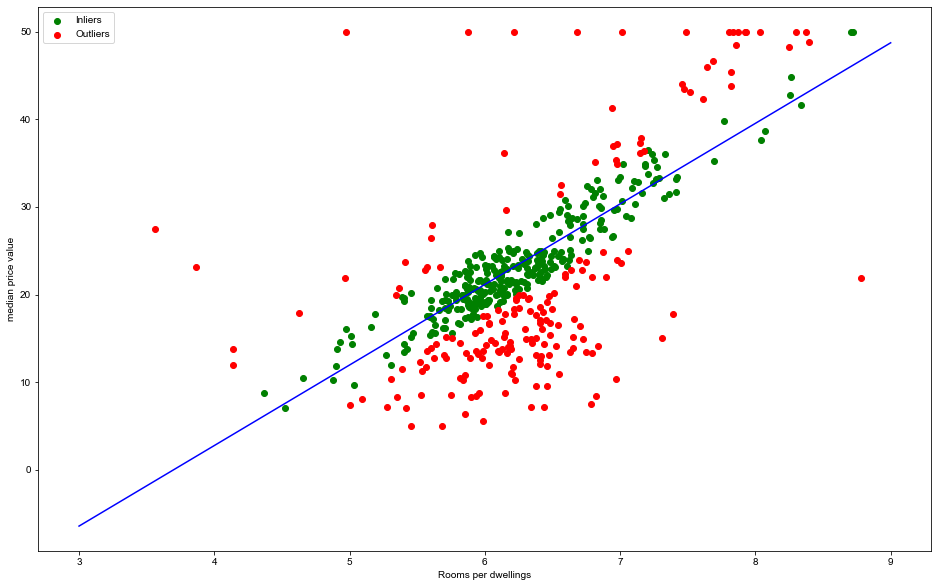

<Figure size 1152x720 with 0 Axes>

In [32]:
# Lets screen the outliers :
plt.scatter(X[inlier_mask],y[inlier_mask],c='green',marker='o',label='Inliers')
plt.scatter(X[outlier],y[outlier],c='red',marker='o',label='Outliers')
plt.plot(line,line_y_ransac,color='blue')
plt.xlabel("Rooms per dwellings")
plt.ylabel("median price value")
plt.legend(loc='upper left')
plt.figure(figsize=(16,10))
sns.set(style='darkgrid')
plt.show();

In [33]:
ransac.estimator_.coef_

array([9.20218318])

In [34]:
ransac.estimator_.intercept_

-34.06287547936903

##### Performance Evaluation of Regression Models :


In [35]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670,22.400
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080,20.600
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640,23.900
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480,22.000


In [36]:
X = data.drop(['MEDV'],axis=1)

In [37]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480


In [38]:
y = data['MEDV'].values

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
linear_model = LinearRegression()

In [41]:
linear_model.fit(X,y)

LinearRegression()

In [42]:
y_train_prediction = linear_model.predict(x_train)

In [43]:
y_test_prediction = linear_model.predict(x_test)

In [46]:
y_test_prediction

array([24.25249073, 24.94331333, 29.68652768, 12.97948781, 21.26198266,
       19.29748321, 21.32536104, 21.42939305, 18.54266897, 19.79013684,
        6.14779852, 16.96071981, 17.68344618,  6.12842196, 40.55765844,
       31.91054611, 23.46878866, 36.12770079, 30.72209056, 23.10891142,
       24.88682244, 24.29082812, 20.75049026, 30.35192656, 22.09669817,
       10.83162324, 17.67103669, 17.28601894, 35.78159518, 20.71548315,
       19.20496304, 18.51247609, 19.86184428, 23.74262478, 29.07194308,
       20.23150811, 11.88145871, 25.9998091 , 18.15955693, 16.1114628 ,
       25.81783237, 20.42320032, 21.59260894, 16.39147632, 22.04734975,
       25.02556238, 19.53928758, 22.36600228,  8.72822362, 24.58022019,
       20.10375923, 16.88541964, 24.48449227, 29.94563374, 13.25645238,
       20.90652153, 19.98446605, 14.78359641, 15.22308298, 22.39251096,
       16.88063827, 21.32529039, 32.79887232, 31.23411512, 18.58838397,
       32.41199147, 19.41291095, 18.99949651, 19.85268454, 22.69

In [47]:
y_train

array([26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1,
       20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5, 12.3, 19.4, 21.2,
       20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4,
       35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6,
       32.9, 36.2, 11. ,  7.2, 22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5,
       15.2, 17.4, 13.6,  8.7, 18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9,
       25. , 12.7, 29.1, 12. , 17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8,
       20.5, 14.9, 10.9, 19.5, 22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3,
       11.8, 31. , 28.7, 16.2, 43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9,
       20.2, 43.1, 34.6, 13.8, 24.3, 21.5, 24.4, 21.2, 23.8, 26.6, 25.1,
        9.6, 19.4, 19.4,  9.5, 14. , 26.5, 13.8, 34.7, 16.3, 21.7, 17.5,
       15.6, 20.9, 21.7, 12.7, 18.5, 23.7, 19.3, 12.7, 21.6, 23.2, 29.6,
       21.2, 23.8, 17.1, 22. , 36.5, 18.8, 21.9, 23.1, 20.2, 17.4, 37. ,
       24.1, 36.2, 15.7, 32.2, 13.5, 17.9, 13.3, 11

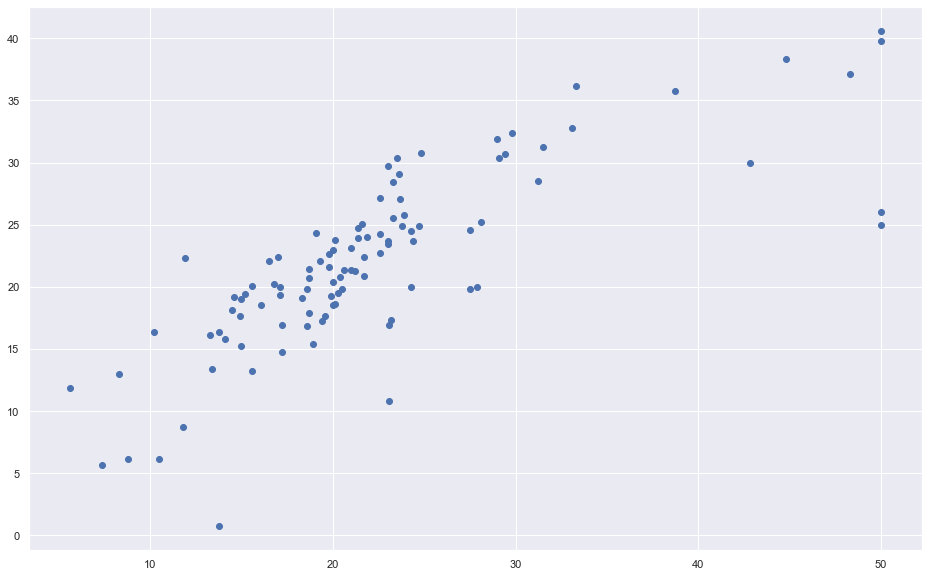

In [50]:
plt.scatter(y_test,y_test_prediction)


###### # Note : If we plot scatter plot with y_test and prediction it should be tighty correlated and should in line format But we can see here the points are little scattered because we used just RM as independent variable so the learning objective is contrained so lets build the model will all features and see 

<AxesSubplot:ylabel='Density'>

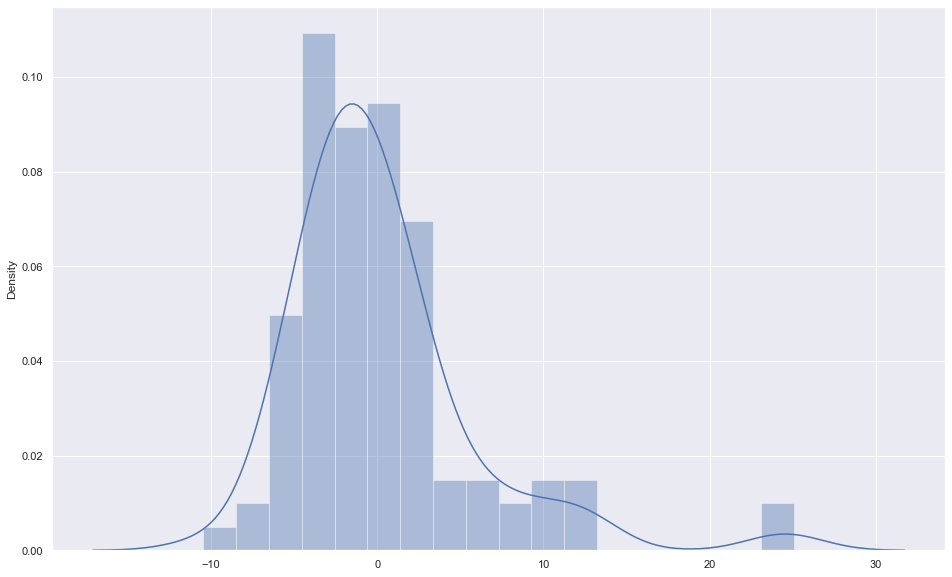

In [51]:
# Lets plot and see the residuals :
sns.distplot((y_test-y_test_prediction))

##### # Here we can see some abnormality instead of normal distribution but the model is build only with one single feature so we can expect this kind of results but while ploting the residuals (nothing but the error actual - predicted) should be normally distributed 

In [54]:
# Lets build the model with all features and plot those results :
x = data.iloc[:,:-1]

In [59]:
y = data['MEDV']

In [60]:
# Lets split the data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_prediction = linear_model.predict(x_test)

In [64]:
y_prediction

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

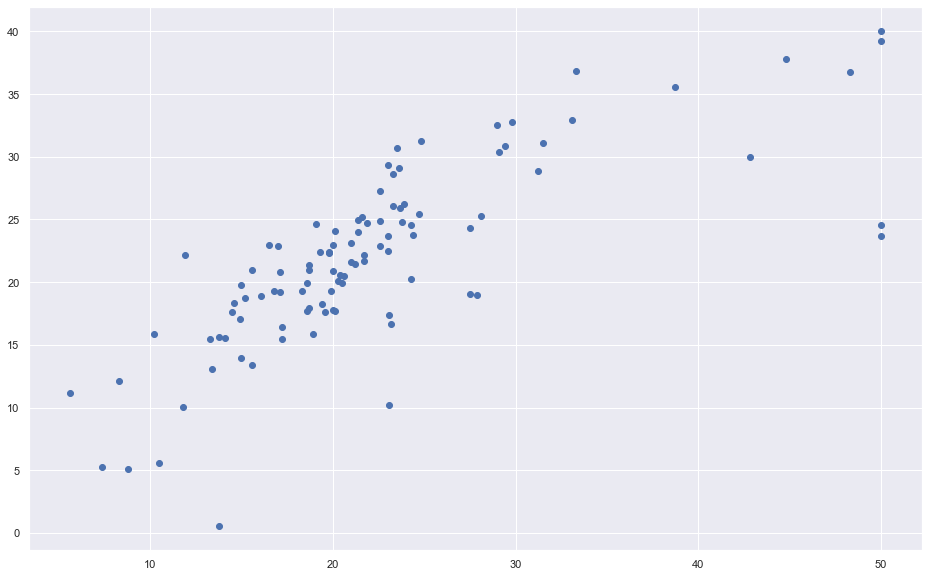

In [66]:
# Lets plot the scatter plot and see the performance 
plt.scatter(y_test,y_prediction)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

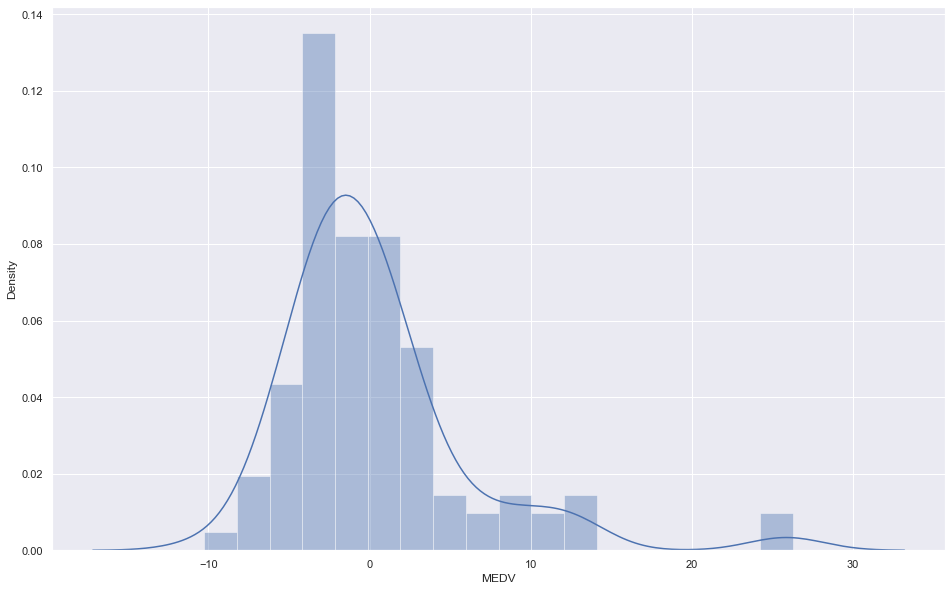

In [67]:
sns.distplot((y_test-y_prediction))

In [76]:
# its same as the past performance lets try standardisation and remove outliers and see the performance 


In [77]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480


In [78]:
y

0     24.000
1     21.600
2     34.700
3     33.400
4     36.200
       ...  
501   22.400
502   20.600
503   23.900
504   22.000
505   11.900
Name: MEDV, Length: 506, dtype: float64

In [79]:
from sklearn.preprocessing import RobustScaler
transfomer = RobustScaler().fit_transform(x)

In [80]:
transfomer

array([[-0.06959315,  1.44      , -0.57164988, ..., -1.33928571,
         0.26190191, -0.63768116],
       [-0.06375455,  0.        , -0.20294345, ..., -0.44642857,
         0.26190191, -0.22188906],
       [-0.06376011,  0.        , -0.20294345, ..., -0.44642857,
         0.06667466, -0.73263368],
       ...,
       [-0.05445006,  0.        ,  0.17350891, ...,  0.69642857,
         0.26190191, -0.57171414],
       [-0.04086745,  0.        ,  0.17350891, ...,  0.69642857,
         0.09641444, -0.48775612],
       [-0.05816351,  0.        ,  0.17350891, ...,  0.69642857,
         0.26190191, -0.34782609]])

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transfomer,y,test_size=0.2,random_state=0)

In [82]:
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [83]:
linear_model.fit(x_train_trans,y_train)

LinearRegression()

In [85]:
y=linear_model.predict(x_test_trans)

In [86]:
from sklearn.metrics import r2_score
print("R2 Score ",r2_score(y_test,y))

R2 Score  0.5892223849182511


##### ########################################################################################################################

In [91]:
X = data.iloc[:,:-1]

In [92]:
y = data['MEDV']

In [94]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()

In [95]:
ransac.fit(X,y)

RANSACRegressor()

In [96]:
inlier_mask  = ransac.inlier_mask_

In [98]:
x[inlier_mask]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
5,0.030,0.000,2.180,0.000,0.458,6.430,58.700,6.062,3.000,222.000,18.700,394.120,5.210
6,0.088,12.500,7.870,0.000,0.524,6.012,66.600,5.561,5.000,311.000,15.200,395.600,12.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.239,0.000,9.690,0.000,0.585,6.019,65.300,2.409,6.000,391.000,19.200,396.900,12.920
499,0.178,0.000,9.690,0.000,0.585,5.569,73.500,2.400,6.000,391.000,19.200,395.770,15.100
500,0.224,0.000,9.690,0.000,0.585,6.027,79.700,2.498,6.000,391.000,19.200,396.900,14.330
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670


In [99]:
y[inlier_mask]

1     21.600
2     34.700
3     33.400
5     28.700
6     22.900
       ...  
498   21.200
499   17.500
500   16.800
501   22.400
502   20.600
Name: MEDV, Length: 347, dtype: float64

In [100]:
x , y = x[inlier_mask],y[inlier_mask]

In [101]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940
5,0.030,0.000,2.180,0.000,0.458,6.430,58.700,6.062,3.000,222.000,18.700,394.120,5.210
6,0.088,12.500,7.870,0.000,0.524,6.012,66.600,5.561,5.000,311.000,15.200,395.600,12.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.239,0.000,9.690,0.000,0.585,6.019,65.300,2.409,6.000,391.000,19.200,396.900,12.920
499,0.178,0.000,9.690,0.000,0.585,5.569,73.500,2.400,6.000,391.000,19.200,395.770,15.100
500,0.224,0.000,9.690,0.000,0.585,6.027,79.700,2.498,6.000,391.000,19.200,396.900,14.330
501,0.063,0.000,11.930,0.000,0.573,6.593,69.100,2.479,1.000,273.000,21.000,391.990,9.670


In [102]:
y

1     21.600
2     34.700
3     33.400
5     28.700
6     22.900
       ...  
498   21.200
499   17.500
500   16.800
501   22.400
502   20.600
Name: MEDV, Length: 347, dtype: float64

In [103]:
# lets scale the data :
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [104]:
# Lets split the data into train and test 

In [105]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [106]:
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [107]:
linear_model.fit(x_train_std,y_train)

LinearRegression()

In [116]:
prediction = linear_model.predict(x_test_std)

In [117]:
len(prediction)

70

In [118]:
len(y_test)

70

In [121]:
print('R2 Score',(r2_score(y_test,prediction)))

R2 Score 0.8629677429983738


##### Lets plot and show the scatter plot 

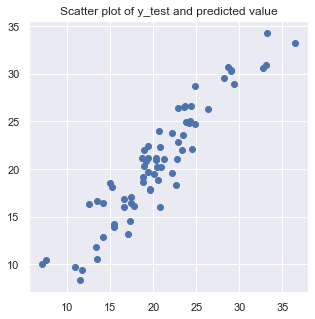

In [127]:
plt.scatter(y_test,prediction)
plt.rcParams['figure.figsize'] =(5,5)
plt.title('Scatter plot of y_test and predicted value')
plt.show()

###### Here you can see that the data points are tightly correlated while comparing with before scatter plots 

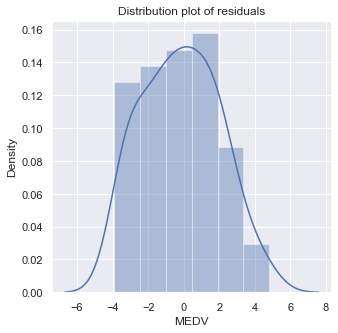

In [130]:
# Lets plot and see the residuals :
sns.distplot((y_test-prediction))
plt.title('Distribution plot of residuals')
plt.show()

###### Here you can the distributions of residuals which is likely a normal distribution which is far better than the before normal distribution chart